## Imports

In [48]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from optimizers import HeavyTailedSGD, HeavyTailedAdagrad
import scipy.stats as sps

import matplotlib.pyplot as plt
%matplotlib inline

## Data Loading setting

In [49]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [50]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./cache', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./cache', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [7]:
print(len(train_loader))
print(len(test_loader))

938
10


In [8]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([1000, 1, 28, 28])

## Model

In [51]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.conv2_drop = nn.Dropout2d(p=0.5)
        self.fc1 = nn.Linear(in_features=320, out_features=50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), kernel_size=2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

# Heavy Tailed SGD example

## Preparation for the training

In [27]:
model = Net()
optimizer = HeavyTailedSGD(model.parameters(), lr=learning_rate,
                      momentum=0)

one iteration training example

/var/folders/mb/p232wx992d13v3jhkxc8hd900000gn/T/ipykernel_54738/3076639084.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 2.3022, Accuracy: 1188/10000 (12%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.311885
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.308943
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.323246
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.254756
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.261031
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.181664
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.121584
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.145437
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.095055
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.983500
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.068182
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.907278
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.757709
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.827387
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.920045
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.675652
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.738241
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.645133
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.704764
Train Epoch: 1 [12160

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2060: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._pdf, _a, x, args=args)[0]


Train Epoch: 2 [29440/60000 (49%)]	Loss: 0.535959
Train Epoch: 2 [30080/60000 (50%)]	Loss: 0.592976
Train Epoch: 2 [30720/60000 (51%)]	Loss: 0.581336
Train Epoch: 2 [31360/60000 (52%)]	Loss: 0.829150
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.544480
Train Epoch: 2 [32640/60000 (54%)]	Loss: 0.537921
Train Epoch: 2 [33280/60000 (55%)]	Loss: 0.540636
Train Epoch: 2 [33920/60000 (57%)]	Loss: 0.494209
Train Epoch: 2 [34560/60000 (58%)]	Loss: 0.661957
Train Epoch: 2 [35200/60000 (59%)]	Loss: 0.513267
Train Epoch: 2 [35840/60000 (60%)]	Loss: 0.618911
Train Epoch: 2 [36480/60000 (61%)]	Loss: 0.617928
Train Epoch: 2 [37120/60000 (62%)]	Loss: 0.774917
Train Epoch: 2 [37760/60000 (63%)]	Loss: 0.515672
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.506745
Train Epoch: 2 [39040/60000 (65%)]	Loss: 0.543180
Train Epoch: 2 [39680/60000 (66%)]	Loss: 0.431985
Train Epoch: 2 [40320/60000 (67%)]	Loss: 0.429512
Train Epoch: 2 [40960/60000 (68%)]	Loss: 0.548993
Train Epoch: 2 [41600/60000 (69%)]	Loss: 0.295719


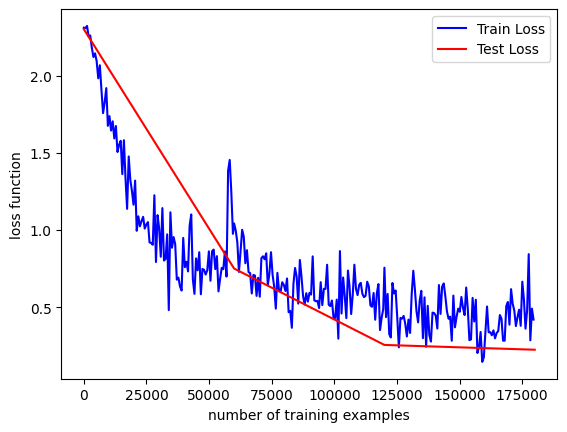

In [33]:
from utils import plot_training

plot_training(model=model, optimizer=optimizer, 
              n_epochs=n_epochs, lr=learning_rate, 
              train_loader=train_loader, 
              test_loader=test_loader, log_interval=log_interval
)

## Averaged over iterations plot

Training iteration:  1

Test set: Avg. loss: 2.5215, Accuracy: 1282/10000 (13%)


Test set: Avg. loss: 0.4601, Accuracy: 8922/10000 (89%)


Test set: Avg. loss: 0.2527, Accuracy: 9309/10000 (93%)


Test set: Avg. loss: 0.1219, Accuracy: 9630/10000 (96%)

Training iteration:  2

Test set: Avg. loss: 2.3534, Accuracy: 777/10000 (8%)


Test set: Avg. loss: 0.3092, Accuracy: 9125/10000 (91%)


Test set: Avg. loss: 0.1558, Accuracy: 9542/10000 (95%)


Test set: Avg. loss: 0.1183, Accuracy: 9643/10000 (96%)

Training iteration:  3

Test set: Avg. loss: 2.3835, Accuracy: 714/10000 (7%)


Test set: Avg. loss: 0.8999, Accuracy: 8894/10000 (89%)


Test set: Avg. loss: 0.3104, Accuracy: 9447/10000 (94%)


Test set: Avg. loss: 0.1600, Accuracy: 9516/10000 (95%)

End of test


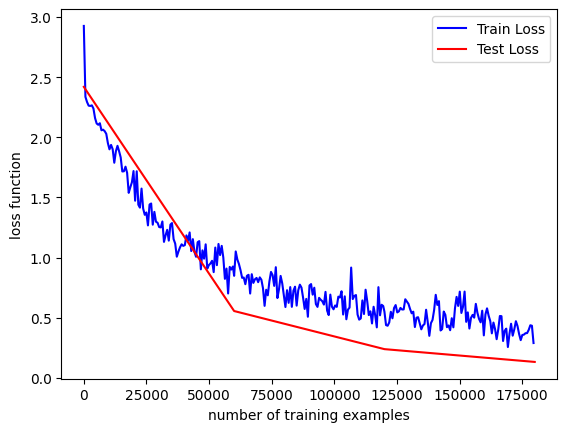

In [37]:
from utils import plot_averaged_training
import warnings
warnings.filterwarnings('ignore')

plot_averaged_training(model=model,
                       optimizer=optimizer, 
                       n_epochs=n_epochs, 
                       lr=learning_rate, 
                       train_loader=train_loader, 
                       test_loader=test_loader, 
                       log_interval=log_interval, 
                       number_of_iterations=3)

# Heavy Tailed AdaGrad example

In [55]:
model = Net()
optimizer = HeavyTailedAdagrad(model.parameters(), lr=learning_rate, lr_decay=0, weight_decay=0, initial_accumulator_value=0)

In [54]:
from torch.optim import Optimizer

class HeavyTailedNoise(sps.rv_continuous):
    """The noise we want to generate."""
    def _pdf(self, x):
        return 1 / (1 + abs(x)) ** 3
    
class _RequiredParameter(object):
    """Singleton class representing a required parameter for an Optimizer."""
    def __repr__(self):
        return "<required parameter>"
    
required = _RequiredParameter()

class HeavyTailedAdagrad(Optimizer):
    def __init__(self, params, lr=required, lr_decay=0, weight_decay=0, initial_accumulator_value=0):
        if lr is not required and lr < 0.0:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= lr_decay:
            raise ValueError("Invalid lr_decay value: {}".format(lr_decay))
        if not 0.0 <= weight_decay:
            raise ValueError("Invalid weight_decay value: {}".format(weight_decay))
        if not 0.0 <= initial_accumulator_value:
            raise ValueError("Invalid initial_accumulator_value value: {}".format(initial_accumulator_value))
        
        defaults = dict(lr=lr, lr_decay=lr_decay, weight_decay=weight_decay, initial_accumulator_value=initial_accumulator_value)
        super(HeavyTailedAdagrad, self).__init__(params, defaults)

        for group in self.param_groups:
            for p in group['params']:
                state = self.state[p]
                state['step'] = 0
                state['sum'] = torch.full_like(p.data, initial_accumulator_value)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue

                d_p = p.grad.data
                state = self.state[p]

                state['step'] += 1

                if group['weight_decay'] != 0:
                    d_p = d_p.add_(group['weight_decay'], p.data)

                clr = group['lr'] / (1 + (state['step'] - 1) * group['lr_decay'])

                noise = self.generate_noise(distr=HeavyTailedNoise())
                d_p = d_p.add_(noise, p.data)

                state['sum'].addcmul_(1, d_p, d_p)
                std = state['sum'].sqrt().add_(1e-10)
                p.data.addcdiv_(-clr, d_p, std)

        return loss
    
    def generate_noise(self, distr):
        noise = None
        while (noise is None):
            try:
                noise = distr.rvs(size=1)[0]
            except Exception:
                pass
        return noise

Training iteration:  1

Test set: Avg. loss: 2.3429, Accuracy: 935/10000 (9%)


Test set: Avg. loss: 0.5112, Accuracy: 8931/10000 (89%)


Test set: Avg. loss: 0.4414, Accuracy: 9099/10000 (91%)


Test set: Avg. loss: 0.3541, Accuracy: 9207/10000 (92%)

Training iteration:  2

Test set: Avg. loss: 2.3315, Accuracy: 1066/10000 (11%)


Test set: Avg. loss: 1.9372, Accuracy: 6071/10000 (61%)


Test set: Avg. loss: 1.4679, Accuracy: 7334/10000 (73%)


Test set: Avg. loss: 1.0779, Accuracy: 7931/10000 (79%)

Training iteration:  3

Test set: Avg. loss: 2.3392, Accuracy: 1016/10000 (10%)


Test set: Avg. loss: 1.9413, Accuracy: 5568/10000 (56%)


Test set: Avg. loss: 1.5761, Accuracy: 6722/10000 (67%)


Test set: Avg. loss: 1.2594, Accuracy: 7423/10000 (74%)

End of test


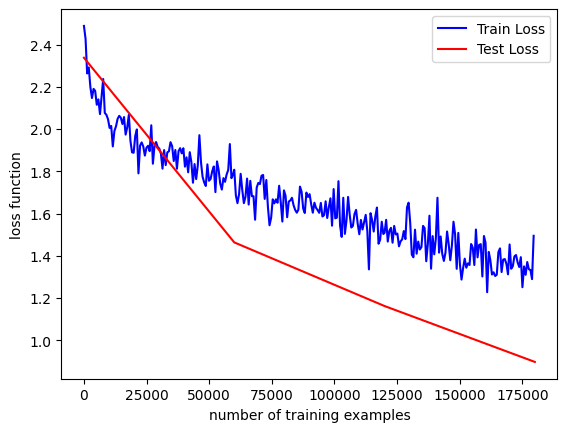

In [56]:
plot_averaged_training(model=model,
                       optimizer=optimizer, 
                       n_epochs=n_epochs, 
                       lr=learning_rate, 
                       train_loader=train_loader, 
                       test_loader=test_loader, 
                       log_interval=log_interval, 
                       number_of_iterations=3)